<a href="https://colab.research.google.com/github/LleilaA13/FDS25-26/blob/main/classnotes/Vectors%26projection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Data Science Fundamentals: Vector Projections and Basis Transformations
Based on slides from Indro Spinelli, Sapienza University of Rome

This comprehensive Python file demonstrates all key concepts from the vector
projections and basis transformation slides through practical code examples.

Author: Generated for educational purposes
Date: September 2025
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pandas as pd

print("="*80)
print("DATA SCIENCE FUNDAMENTALS: VECTORS, PROJECTIONS, AND BASIS TRANSFORMATIONS")
print("="*80)

# ==============================================================================
# 1. IRIS DATASET - INTRODUCTION TO SUPERVISED LEARNING
# ==============================================================================

def demonstrate_iris_dataset():
    """
    Demonstrate the classic Fisher's Iris dataset used in supervised learning.

    The Iris dataset contains:
    - 150 iris flowers: 50 each of versicolor, virginica, setosa
    - Features: sepal length/width, petal length/width (in cm)
    - Target: species classification
    """
    print("\n" + "="*50)
    print("1. IRIS DATASET - CLASSIC EXAMPLE")
    print("="*50)

    # Load the famous Fisher's Iris dataset
    iris = load_iris()
    X = iris.data  # Features: sepal length/width, petal length/width (in cm)
    y = iris.target  # Target: species (setosa, versicolor, virginica)

    print(f"Dataset shape: {X.shape}")
    print(f"Features: {iris.feature_names}")
    print(f"Target classes: {iris.target_names}")
    print(f"First 5 samples:")
    print(X[:5])
    print(f"Corresponding targets: {y[:5]}")

    # Create a DataFrame for better visualization
    iris_df = pd.DataFrame(X, columns=iris.feature_names)
    iris_df['species'] = iris.target_names[y]
    print(f"\nDataset preview:")
    print(iris_df.head())

    return iris, X, y

# ==============================================================================
# 2. DATA TYPES AND ENCODING
# ==============================================================================

def one_hot_encode(categorical_data):
    """
    Transform categorical variable with k categories into k-dimensional binary vector.

    This demonstrates the encoding concept from the slides:
    - Each vector has exactly one element set to 1 to indicate the category
    - All other elements are 0

    Args:
        categorical_data: Array of categorical values

    Returns:
        encoded: One-hot encoded matrix (n_samples x n_categories)
        unique_categories: Array of unique category labels
    """
    unique_categories = np.unique(categorical_data)
    k = len(unique_categories)
    n_samples = len(categorical_data)

    # Create one-hot encoded matrix
    encoded = np.zeros((n_samples, k))
    for i, category in enumerate(categorical_data):
        category_index = np.where(unique_categories == category)[0][0]
        encoded[i, category_index] = 1

    return encoded, unique_categories

def demonstrate_data_encoding():
    """Demonstrate categorical encoding concepts from the slides."""
    print("\n" + "="*50)
    print("2. DATA TYPES AND CATEGORICAL ENCODING")
    print("="*50)

    # Load iris data
    iris = load_iris()

    # Example with iris species
    species_encoded, species_categories = one_hot_encode(iris.target_names[iris.target])
    print(f"Original categories: {species_categories}")
    print(f"One-hot encoded shape: {species_encoded.shape}")
    print(f"First 5 encoded samples:")
    print(species_encoded[:5])

# ==============================================================================
# 3. MEAN-CENTERING DATA
# ==============================================================================

def mean_center_data(X):
    """
    Mean-center the data by subtracting the mean along each dimension.

    From slides: "a simple and completely reversible operation that involves
    subtracting off the mean of the dataset along each input dimension -
    so that it straddles the origin."

    Args:
        X: Input data matrix (n_samples x n_features)

    Returns:
        X_centered: Mean-centered data
        means: Original means for each feature
    """
    means = np.mean(X, axis=0)
    X_centered = X - means
    return X_centered, means

def demonstrate_mean_centering():
    """Demonstrate mean-centering transformation."""
    print("\n" + "="*50)
    print("3. MEAN-CENTERING TRANSFORMATION")
    print("="*50)

    # Load and center iris data
    iris = load_iris()
    X = iris.data
    X_centered, original_means = mean_center_data(X)

    print(f"Original data mean: {original_means}")
    print(f"Centered data mean: {np.mean(X_centered, axis=0)}")
    print(f"Standard deviation unchanged: {np.std(X, axis=0)} vs {np.std(X_centered, axis=0)}")

    return X_centered

# ==============================================================================
# 4. VECTOR SPACES AND SPANNING SETS
# ==============================================================================

def check_linear_independence(vectors):
    """
    Check if vectors are linearly independent.

    From slides: "they must be linearly independent" - vectors in a basis
    cannot be redundant and must point in different directions.

    Args:
        vectors: List of numpy arrays representing vectors

    Returns:
        bool: True if vectors are linearly independent
    """
    matrix = np.column_stack(vectors)
    if matrix.shape[0] == matrix.shape[1]:
        det = np.linalg.det(matrix)
        return abs(det) > 1e-10  # Account for numerical precision
    else:
        # For non-square matrices, check rank
        rank = np.linalg.matrix_rank(matrix)
        return rank == min(matrix.shape)

def demonstrate_vector_spaces():
    """Demonstrate vector spaces, spanning sets, and basis concepts."""
    print("\n" + "="*50)
    print("4. VECTOR SPACES, SPANNING SETS, AND BASIS")
    print("="*50)

    # Example in 2D space with standard basis vectors
    e1 = np.array([1, 0])  # Standard basis vector 1
    e2 = np.array([0, 1])  # Standard basis vector 2

    print(f"Standard basis vectors:")
    print(f"e1 = {e1}")
    print(f"e2 = {e2}")

    # Any point in 2D can be written as x*e1 + y*e2
    point = np.array([3, 4])
    print(f"\nPoint {point} can be written as:")
    print(f"{point[0]}*e1 + {point[1]}*e2 = {point[0]*e1 + point[1]*e2}")

    print(f"\nStandard basis vectors linearly independent: {check_linear_independence([e1, e2])}")

    return e1, e2

# ==============================================================================
# 5. ORTHONORMAL BASIS REPRESENTATION
# ==============================================================================

def is_orthonormal(basis_vectors):
    """
    Check if basis vectors are orthonormal (orthogonal + unit length).

    From slides: "Often such spanning sets are likewise referred to as orthonormal."
    For orthonormal basis: C^T * C = I (identity matrix)

    Args:
        basis_vectors: List of basis vectors

    Returns:
        bool: True if basis is orthonormal
    """
    C = np.column_stack(basis_vectors)
    # For orthonormal basis: C^T * C = I (identity matrix)
    gram_matrix = C.T @ C
    identity = np.eye(C.shape[1])
    return np.allclose(gram_matrix, identity, atol=1e-10)

def encode_orthonormal(data_point, basis_vectors):
    """
    Encode data point using orthonormal basis via inner product.

    From slides: "we get the solution (the encoded version of each point)
    as a simple inner product of the spanning set against each data point!"

    Args:
        data_point: Point to encode
        basis_vectors: List of orthonormal basis vectors

    Returns:
        encoding: Coefficients in the new basis
    """
    C = np.column_stack(basis_vectors)
    encoding = C.T @ data_point  # Simple inner product
    return encoding

def decode_orthonormal(encoding, basis_vectors):
    """
    Decode from basis representation back to original space.

    Args:
        encoding: Coefficients in basis representation
        basis_vectors: List of basis vectors

    Returns:
        decoded: Point in original space
    """
    C = np.column_stack(basis_vectors)
    decoded = C @ encoding
    return decoded

def demonstrate_orthonormal_basis():
    """Demonstrate orthonormal basis representation."""
    print("\n" + "="*50)
    print("5. ORTHONORMAL BASIS REPRESENTATION")
    print("="*50)

    # Standard basis
    e1 = np.array([1, 0])
    e2 = np.array([0, 1])
    standard_basis = [e1, e2]

    print(f"Standard basis is orthonormal: {is_orthonormal(standard_basis)}")

    # Example encoding/decoding
    test_point = np.array([3, 4])
    encoding = encode_orthonormal(test_point, standard_basis)
    decoded = decode_orthonormal(encoding, standard_basis)

    print(f"\nEncoding of point {test_point}: {encoding}")
    print(f"Decoded point: {decoded}")
    print(f"Perfect reconstruction: {np.allclose(test_point, decoded)}")

# ==============================================================================
# 6. NON-STANDARD BASIS TRANSFORMATIONS
# ==============================================================================

def encode_general_basis(data_point, basis_vectors):
    """
    Encode data point using general (possibly non-orthonormal) basis.

    From slides: For non-orthonormal basis, we need to solve a system of equations.
    Solves: C * w = x for weights w, where C is the basis matrix.

    Args:
        data_point: Point to encode
        basis_vectors: List of basis vectors (may be non-orthonormal)

    Returns:
        weights: Coefficients in the new basis
    """
    C = np.column_stack(basis_vectors)
    # Solve the system C * w = x using least squares
    weights = np.linalg.lstsq(C, data_point, rcond=None)[0]
    return weights

def decode_general_basis(weights, basis_vectors):
    """Decode from basis representation using general basis."""
    C = np.column_stack(basis_vectors)
    decoded = C @ weights
    return decoded

def demonstrate_non_standard_basis():
    """Demonstrate non-standard basis transformations."""
    print("\n" + "="*50)
    print("6. NON-STANDARD BASIS TRANSFORMATIONS")
    print("="*50)

    # Create a non-orthonormal basis
    c1 = np.array([1, 1])    # Not unit length, not orthogonal to c2
    c2 = np.array([1, -0.5]) # Different direction
    non_standard_basis = [c1, c2]

    print(f"Non-standard basis vectors:")
    print(f"c1 = {c1}")
    print(f"c2 = {c2}")
    print(f"Is orthonormal: {is_orthonormal(non_standard_basis)}")

    # Example with non-standard basis
    test_point = np.array([3, 4])
    weights = encode_general_basis(test_point, non_standard_basis)
    decoded = decode_general_basis(weights, non_standard_basis)

    print(f"\nOriginal point: {test_point}")
    print(f"Weights in non-standard basis: {weights}")
    print(f"Decoded point: {decoded}")
    print(f"Reconstruction error: {np.linalg.norm(test_point - decoded)}")

    return non_standard_basis

# ==============================================================================
# 7. SUBSPACE PROJECTIONS
# ==============================================================================

def project_onto_subspace(data_points, basis_vectors):
    """
    Project data points onto subspace spanned by basis vectors.

    From slides: "This process is called a projection, because it is obtained by
    'dropping' a point perpendicularly onto the subspace spanned by the K basis elements."

    Args:
        data_points: Matrix of data points (n_samples x n_features)
        basis_vectors: List of basis vectors spanning the subspace

    Returns:
        weights: Coefficients in the subspace basis (n_samples x k)
        projected_points: Reconstructed points in original space (n_samples x n_features)
    """
    C = np.column_stack(basis_vectors)

    # For multiple points, solve: C * W = X for weight matrix W
    # Using pseudo-inverse to handle non-square matrices
    weights = np.linalg.pinv(C) @ data_points.T

    # Reconstruct points in original space (this gives the projection)
    projected_points = C @ weights

    return weights.T, projected_points.T

def demonstrate_subspace_projections():
    """Demonstrate subspace projections when K < N dimensions."""
    print("\n" + "="*50)
    print("7. SUBSPACE PROJECTIONS (K < N DIMENSIONS)")
    print("="*50)

    # Generate 3D data points
    np.random.seed(42)
    data_3d = np.random.randn(10, 3) * 2  # 10 points in 3D

    # Define 2D subspace basis (2 vectors in 3D space)
    subspace_basis = [
        np.array([1, 0, 1]) / np.sqrt(2),  # Normalized
        np.array([0, 1, 0])                # Already unit length
    ]

    print(f"Original 3D data shape: {data_3d.shape}")
    print(f"Subspace dimension: {len(subspace_basis)}")

    # Project onto 2D subspace
    weights_2d, projected_3d = project_onto_subspace(data_3d, subspace_basis)

    print(f"Projected weights shape: {weights_2d.shape}")
    print(f"Reconstructed points shape: {projected_3d.shape}")

    # Calculate projection errors
    projection_errors = np.linalg.norm(data_3d - projected_3d, axis=1)
    print(f"Average projection error: {np.mean(projection_errors):.4f}")

    return data_3d, subspace_basis, weights_2d, projected_3d

# ==============================================================================
# 8. COMPLETE PROJECTION EXAMPLE WITH IRIS DATA
# ==============================================================================

def demonstrate_iris_projection():
    """Apply projection concepts to real Iris dataset using PCA."""
    print("\n" + "="*50)
    print("8. PRACTICAL EXAMPLE: PROJECTING IRIS DATA")
    print("="*50)

    # Load and center iris data
    iris = load_iris()
    X_centered, _ = mean_center_data(iris.data)

    # Apply PCA to find principal components
    pca = PCA()
    pca.fit(X_centered)

    # Use first 2 principal components as our basis
    pc1 = pca.components_[0]  # First principal component
    pc2 = pca.components_[1]  # Second principal component
    pca_basis = [pc1, pc2]

    print(f"First principal component: {pc1}")
    print(f"Second principal component: {pc2}")
    print(f"Are PCs orthonormal: {is_orthonormal(pca_basis)}")

    # Project 4D iris data onto 2D PCA subspace
    weights_pca, projected_iris = project_onto_subspace(X_centered, pca_basis)

    print(f"Original iris data: {X_centered.shape}")
    print(f"PCA weights (2D projection): {weights_pca.shape}")
    print(f"Reconstructed 4D data: {projected_iris.shape}")

    # Calculate explained variance
    total_variance = np.sum(pca.explained_variance_)
    explained_by_2d = np.sum(pca.explained_variance_[:2])
    print(f"Variance explained by 2D projection: {explained_by_2d/total_variance:.2%}")

    return pca_basis, weights_pca, projected_iris

# ==============================================================================
# 9. OPTIMIZATION FORMULATION
# ==============================================================================

def find_optimal_weights_batch(data_matrix, basis_vectors):
    """
    Find optimal weights for all data points simultaneously.

    From slides: "our optimization problem to recover all of the proper
    weight vectors can be expressed as" minimizing ||X - C*W||_F^2

    Minimizes: ||X - C*W||_F^2 where F is Frobenius norm
    Solution: W = (C^T*C)^(-1) * C^T * X

    Args:
        data_matrix: Matrix of data points (n_samples x n_features)
        basis_vectors: List of basis vectors

    Returns:
        W: Optimal weight matrix (n_samples x k)
        X_reconstructed: Reconstructed data (n_samples x n_features)
        error: Total reconstruction error
    """
    X = data_matrix.T  # Make it feature x sample
    C = np.column_stack(basis_vectors)

    # Normal equation solution
    CtC_inv = np.linalg.pinv(C.T @ C)
    W = CtC_inv @ C.T @ X

    # Calculate reconstruction
    X_reconstructed = C @ W

    # Calculate total reconstruction error
    error = np.linalg.norm(X - X_reconstructed, 'fro')**2

    return W.T, X_reconstructed.T, error

def demonstrate_optimization_formulation():
    """Demonstrate optimization formulation for finding weights."""
    print("\n" + "="*50)
    print("9. OPTIMIZATION FORMULATION FOR FINDING WEIGHTS")
    print("="*50)

    # Generate example data and basis
    np.random.seed(42)
    data_3d = np.random.randn(10, 3) * 2
    subspace_basis = [
        np.array([1, 0, 1]) / np.sqrt(2),
        np.array([0, 1, 0])
    ]

    # Apply optimization formulation
    W_optimal, X_reconstructed, total_error = find_optimal_weights_batch(data_3d, subspace_basis)

    print(f"Optimal weights shape: {W_optimal.shape}")
    print(f"Total reconstruction error: {total_error:.6f}")
    print(f"Average per-point error: {total_error/len(data_3d):.6f}")

# ==============================================================================
# 10. PRACTICAL UTILITY CLASS
# ==============================================================================

class BasisTransformer:
    """
    A comprehensive class that encapsulates all basis transformation operations.

    This class implements all the concepts from the slides in a reusable form:
    - Automatic detection of orthonormal vs general basis
    - Efficient encoding/decoding operations
    - Subspace projection capabilities
    - Error analysis
    """

    def __init__(self, basis_vectors):
        """
        Initialize the basis transformer.

        Args:
            basis_vectors: List of basis vectors
        """
        self.basis_vectors = [np.array(v) for v in basis_vectors]
        self.C = np.column_stack(self.basis_vectors)
        self.is_orthonormal = self._check_orthonormal()

        # Pre-compute transformation matrices for efficiency
        if self.is_orthonormal:
            self.encode_matrix = self.C.T
            self.decode_matrix = self.C
        else:
            # Use pseudo-inverse for general case
            self.encode_matrix = np.linalg.pinv(self.C)
            self.decode_matrix = self.C

    def _check_orthonormal(self):
        """Check if basis is orthonormal."""
        gram = self.C.T @ self.C
        identity = np.eye(len(self.basis_vectors))
        return np.allclose(gram, identity, atol=1e-10)

    def encode(self, data_points):
        """
        Encode data points in the new basis.

        Args:
            data_points: Single point or matrix of points

        Returns:
            encoded: Coefficients in the new basis
        """
        if data_points.ndim == 1:
            return self.encode_matrix @ data_points
        else:
            return (self.encode_matrix @ data_points.T).T

    def decode(self, weights):
        """
        Decode from basis representation to original space.

        Args:
            weights: Coefficients in basis representation

        Returns:
            decoded: Points in original space
        """
        if weights.ndim == 1:
            return self.decode_matrix @ weights
        else:
            return (self.decode_matrix @ weights.T).T

    def project(self, data_points):
        """
        Project data points onto the subspace (encode then decode).

        This implements the "projection" concept from the slides.

        Args:
            data_points: Points to project

        Returns:
            projected: Projected points (closest approximation in subspace)
        """
        weights = self.encode(data_points)
        return self.decode(weights)

    def reconstruction_error(self, data_points):
        """
        Calculate reconstruction error for projection.

        Args:
            data_points: Original points

        Returns:
            errors: Reconstruction error(s)
        """
        projected = self.project(data_points)
        if data_points.ndim == 1:
            return np.linalg.norm(data_points - projected)
        else:
            return np.linalg.norm(data_points - projected, axis=1)

def demonstrate_utility_class():
    """Demonstrate the BasisTransformer utility class."""
    print("\n" + "="*50)
    print("10. PRACTICAL UTILITY CLASS")
    print("="*50)

    print("Testing BasisTransformer utility class:")

    # Load iris data and create PCA basis
    iris = load_iris()
    X_centered, _ = mean_center_data(iris.data)
    pca = PCA()
    pca.fit(X_centered)
    pca_basis = [pca.components_[0], pca.components_[1]]

    # Create transformer with PCA basis
    pca_transformer = BasisTransformer(pca_basis)
    print(f"PCA basis is orthonormal: {pca_transformer.is_orthonormal}")

    # Project some iris data
    sample_data = X_centered[:5]
    projected_sample = pca_transformer.project(sample_data)
    reconstruction_errors = pca_transformer.reconstruction_error(sample_data)

    print(f"Sample reconstruction errors: {reconstruction_errors}")
    print(f"Average error: {np.mean(reconstruction_errors):.6f}")

DATA SCIENCE FUNDAMENTALS: VECTORS, PROJECTIONS, AND BASIS TRANSFORMATIONS


In [ ]:
# ==============================================================================
# VISUALIZATIONS
# ==============================================================================

def visualize_iris_data(iris, X, y):
    """Visualize the Iris dataset in 2D (using the first two features)."""
    print("\n" + "="*50)
    print("VISUALIZATION: IRIS DATASET")
    print("="*50)

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title('Iris Dataset (Sepal Length vs Sepal Width)')
    plt.colorbar(scatter, ticks=[0, 1, 2], label='Species', format=plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)]))
    plt.grid(True)
    plt.show()

def visualize_projection(original_points, projected_points, basis_vectors):
    """Visualize 3D points and their projection onto a 2D subspace."""
    print("\n" + "="*50)
    print("VISUALIZATION: SUBSPACE PROJECTION (3D to 2D)")
    print("="*50)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot original points
    ax.scatter(original_points[:, 0], original_points[:, 1], original_points[:, 2], c='b', marker='o', label='Original Points')

    # Plot projected points
    ax.scatter(projected_points[:, 0], projected_points[:, 1], projected_points[:, 2], c='r', marker='x', label='Projected Points')

    # Plot projection lines
    for i in range(original_points.shape[0]):
        ax.plot([original_points[i, 0], projected_points[i, 0]],
                [original_points[i, 1], projected_points[i, 1]],
                [original_points[i, 2], projected_points[i, 2]], 'k--', linewidth=0.5)

    # Plot basis vectors (scaled for visibility)
    ax.quiver(0, 0, 0, basis_vectors[0][0]*5, basis_vectors[0][1]*5, basis_vectors[0][2]*5, color='g', label='Basis Vector 1', arrow_length_ratio=0.1)
    ax.quiver(0, 0, 0, basis_vectors[1][0]*5, basis_vectors[1][1]*5, basis_vectors[1][2]*5, color='m', label='Basis Vector 2', arrow_length_ratio=0.1)


    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Projection of 3D points onto a 2D Subspace')
    ax.legend()
    plt.show()

def visualize_pca_projection(weights_pca, y, iris):
    """Visualize the 2D PCA projection of the Iris dataset."""
    print("\n" + "="*50)
    print("VISUALIZATION: IRIS PCA PROJECTION (2D)")
    print("="*50)

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(weights_pca[:, 0], weights_pca[:, 1], c=y, cmap='viridis', s=50)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Iris Dataset Projected onto First Two Principal Components')
    plt.colorbar(scatter, ticks=[0, 1, 2], label='Species', format=plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)]))
    plt.grid(True)
    plt.show()


1. IRIS DATASET - CLASSIC EXAMPLE
Dataset shape: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']
First 5 samples:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Corresponding targets: [0 0 0 0 0]

Dataset preview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

2. DATA TYPES AND CATEGORICAL ENCODING
Original categories: ['setosa' 'versicolor'

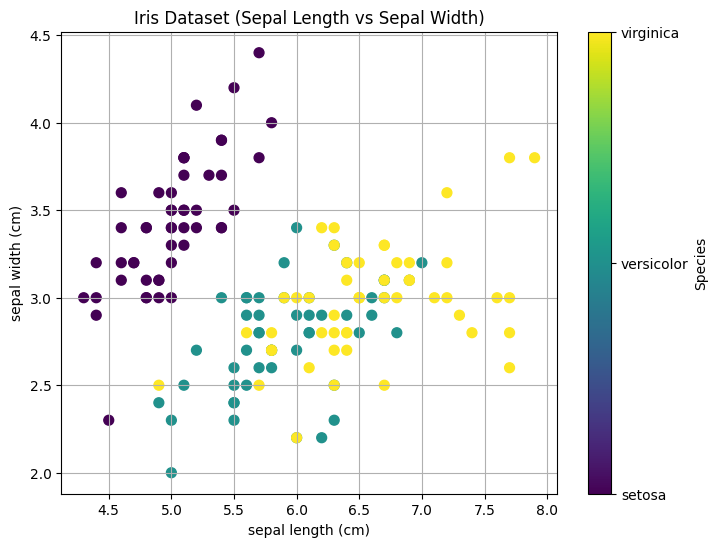


VISUALIZATION: SUBSPACE PROJECTION (3D to 2D)


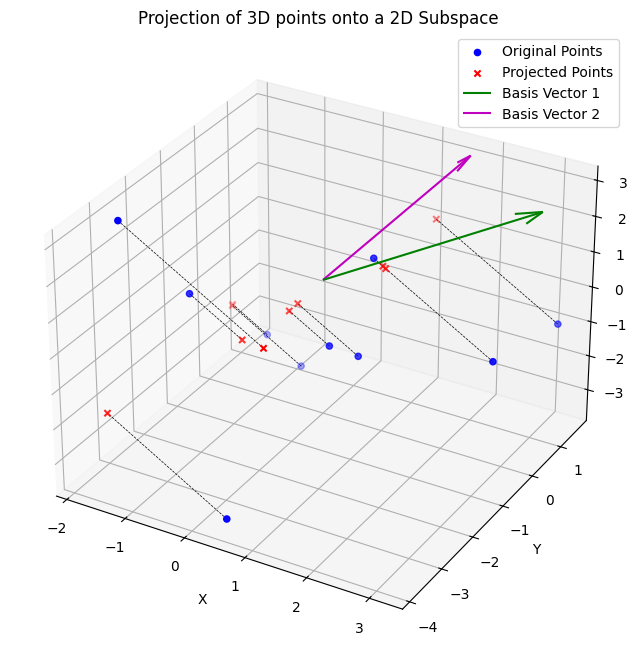


VISUALIZATION: IRIS PCA PROJECTION (2D)


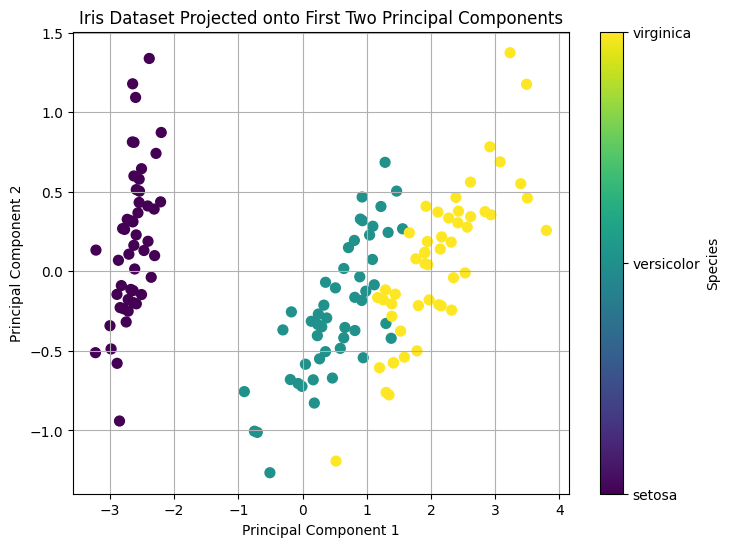


SUMMARY: KEY CONCEPTS IMPLEMENTED
“ 1. Data Types and One-Hot Encoding for categorical variables
“ 2. Mean-centering for data preprocessing
“ 3. Vector spaces, spanning sets, and basis concepts
“ 4. Standard (orthonormal) vs. non-standard basis transformations
“ 5. Encoding/decoding operations for different basis types
“ 6. Subspace projections when K < N dimensions
“ 7. Optimization formulation for finding optimal weights
“ 8. Practical implementations with real data (Iris dataset)
“ 9. Error analysis and reconstruction quality metrics
“ 10. Utility classes for reusable basis transformations
“ 11. Visualizations for Iris data and projections

All concepts from the slides have been implemented with practical examples and visualizations!
The code demonstrates the mathematical foundations of data representation,
basis transformations, and subspace projections - core concepts in data science.


In [ ]:
def main():
    """Run all demonstrations and visualizations of the concepts from the slides."""

    # Run all demonstrations and capture outputs
    iris, X, y = demonstrate_iris_dataset()
    demonstrate_data_encoding()
    X_centered = demonstrate_mean_centering()
    e1, e2 = demonstrate_vector_spaces()
    demonstrate_orthonormal_basis()
    non_standard_basis = demonstrate_non_standard_basis()
    data_3d, subspace_basis, weights_2d, projected_3d = demonstrate_subspace_projections()
    pca_basis, weights_pca, projected_iris = demonstrate_iris_projection()
    demonstrate_optimization_formulation()
    demonstrate_utility_class()

    # Run visualizations
    visualize_iris_data(iris, X, y)
    visualize_projection(data_3d, projected_3d, subspace_basis)
    visualize_pca_projection(weights_pca, y, iris)

    # Summary
    print("\n" + "="*80)
    print("SUMMARY: KEY CONCEPTS IMPLEMENTED")
    print("="*80)

    summary_concepts = [
        "1. Data Types and One-Hot Encoding for categorical variables",
        "2. Mean-centering for data preprocessing",
        "3. Vector spaces, spanning sets, and basis concepts",
        "4. Standard (orthonormal) vs. non-standard basis transformations",
        "5. Encoding/decoding operations for different basis types",
        "6. Subspace projections when K < N dimensions",
        "7. Optimization formulation for finding optimal weights",
        "8. Practical implementations with real data (Iris dataset)",
        "9. Error analysis and reconstruction quality metrics",
        "10. Utility classes for reusable basis transformations",
        "11. Visualizations for Iris data and projections"
    ]

    for concept in summary_concepts:
        print(f"“ {concept}")

    print(f"\n{'='*80}")
    print("All concepts from the slides have been implemented with practical examples and visualizations!")
    print("The code demonstrates the mathematical foundations of data representation,")
    print("basis transformations, and subspace projections - core concepts in data science.")
    print(f"{'='*80}")

if __name__ == "__main__":
    main()